# Abusive Comment classifier

[Prashant Brahmbhatt](https://www.github.com/hashbanger)  
[Garvit Arya](https://www.github.com/garvit512)

___

Importing the necessities

In [1]:
import re
import pickle
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [24]:
train_data = pd.read_csv('train.csv')

## Exploratory Analysis

Taking a peek at the data

In [25]:
train_data.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


### Checking for Null Values

In [26]:
train_data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

We can see that there are no null values that we may need to fill up

_________

Checking the numbers of clean comments and tagged abusive commen`ts

Engineering feature for clean comments

In [27]:
train_data['Clean'] = 1-train_data.max(axis = 1)

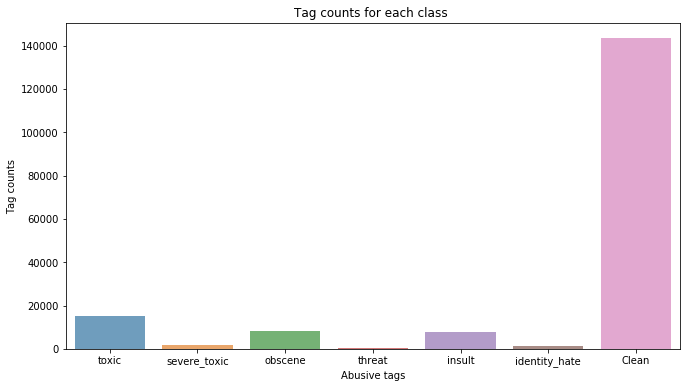

Total values in the data = 159571

Total tags = 35098

Clean Comments = 143346

Toxic: 15294
Severe Toxic: 1595
Obscene: 8449
Threat: 478
Insult: 7877
Identity Hate: 1405


In [28]:
plt.figure(figsize= (11,6))
sns.barplot(x = train_data.iloc[:, 2:].sum().index, 
            y = train_data.iloc[:, 2:].sum().values, alpha = 0.7)
plt.xlabel('Abusive tags')
plt.ylabel('Tag counts')
plt.title('Tag counts for each class ')
plt.show()
print("Total values in the data = "+str(len(train_data)))
print("\nTotal tags = "+str(sum(train_data.iloc[:, 2:-1].sum().values) ))
print("\nClean Comments = "+str(len(train_data[train_data['Clean'] == 1])))
print("\nToxic: {}\nSevere Toxic: {}\nObscene: {}\nThreat: {}\nInsult: {}\nIdentity Hate: {}"
      .format(len(train_data[train_data['toxic']== 1]),len(train_data[train_data['severe_toxic']== 1]), len(train_data[train_data['obscene']== 1]),
             len(train_data[train_data['threat']== 1]), len(train_data[train_data['insult']== 1]), len(train_data[train_data['identity_hate']== 1])))

We can observe that there are 35k tags and 143k clean comments out of 159k comments.   
It implies that there are multi - label comments

In [29]:
train_labels = train_data.iloc[:,2:8]

In [30]:
label_cols = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

## Cleaning the data and using TF-IDF

Removing the punctuations, digits and some other symbols

In [31]:
del_symbols = ['«', '»', '®', '´', '·','º', '½', '¾', '¿', '¡', '§', '£', '₤']

In [32]:
def remove_punc(txt):
    plain_txt = (ch for ch in txt if(ch not in string.punctuation and ch not in string.digits and ch not in del_symbols))
    plain_txt = ''.join(plain_txt)
    return plain_txt

**Removing punctuations**

Now we apply the function we created just above to remove punctutations from both the sets.

In [33]:
# Don't Execute this and instead of this, use pickle files
# train_data['comment_text'] = train_data['comment_text'].apply(remove_punc)
# test_data['comment_text'] = test_data['comment_text'].apply(remove_punc)

Making **Pickle files**

In [34]:
#pickle.dump(train_data,open('train_data_after_punc.pkl','wb'))
#pickle.dump(test_data,open('test_data_after_punc.pkl','wb'))

**Loading pickle files**

In [35]:
train_data_wthout_punc = pickle.load(open('train_data_after_punc.pkl','rb'))
#test_data_wthout_punc = pickle.load(open('test_data_after_punc.pkl','rb'))

Applying **TF-IDF Algorithm** on comments i.e Converting ***words to vectors***

In [36]:
n = train_data_wthout_punc.shape[0]
vectorizer = TfidfVectorizer(ngram_range = (1,2), min_df = 3, max_df = 0.9,
                      strip_accents = 'unicode', use_idf = 0.9, smooth_idf = 1, sublinear_tf = 1)

In [37]:
# Don't run this and use Pickle file directly
# run this if there is error in final output with using pickle file

# train_data_sparse = vectorizer.fit_transform(train_data_wthout_punc['comment_text'])
# test_data_sparse = vectorizer.fit_transform(train_data_wthout_punc['comment_text'])

# we got a sparse matrix of vectors

#### Making pickle

In [38]:
#pickle.dump(train_data_sparse,open('train_data_in_sparse_matrix.pkl','wb'))
#pickle.dump(test_data_sparse,open('test_data_in_sparse_matrix.pkl','wb'))

#### loading pickle

In [39]:
train_data_in_sparse_matrix = pickle.load(open('train_data_sparse_pickle.pkl','rb'))
#test_data_in_sparse_matrix = pickle.load(open('test_data_sparse_pickle.pkl','rb'))

## Making model with Naive Bayes

#### Multiclass Classification

In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV

In [41]:
one_vs_rest_classifier= OneVsRestClassifier(MultinomialNB())
one_vs_rest_classifier.fit(train_data_in_sparse_matrix, train_labels)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=None)

In [42]:
predict = one_vs_rest_classifier.predict(train_data_in_sparse_matrix)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(train_data[label_cols], predict))

              precision    recall  f1-score   support

           0       0.99      0.27      0.43     15294
           1       1.00      0.01      0.01      1595
           2       0.98      0.22      0.36      8449
           3       0.00      0.00      0.00       478
           4       0.95      0.14      0.25      7877
           5       0.00      0.00      0.00      1405

   micro avg       0.98      0.20      0.34     35098
   macro avg       0.65      0.11      0.17     35098
weighted avg       0.93      0.20      0.33     35098
 samples avg       0.03      0.02      0.02     35098



In [44]:
# pickle.dump(one_vs_rest_classifier,open('one_vs_rest_classifier.pkl','wb'))

In [45]:
classifier = pickle.load(open('one_vs_rest_classifier.pkl','rb'))

In [47]:
vectorizer = pickle.load(open('vectorizer.pkl','rb'))

## The spam classifier

Importing the data!

In [48]:
messages = [line.rstrip() for line in open("SMSSpamCollection")]

messages = pd.read_csv('SMSSpamCollection', sep='\t',names = ['Label','Message'])

removing the puctuations!

In [49]:
def text_process(mess):
    '''
    Removing the punctuations
    Removing the common words 
    Returning the cleaned words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Importing the necessities

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer= text_process).fit(messages['Message'])
bow_messages = bow_transformer.transform(messages['Message'])

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['Message'], messages['Label'], test_size = 0.25, random_state = 0)


Creating the pipeline

In [53]:
from sklearn.pipeline import Pipeline
#parameters
'''steps : list
    List of (name, transform) tuples (implementing fit/transform) that are
    chained, in the order in which they are chained, with the last object
    an estimator.'''
pipeline = Pipeline([
                    ('bow', CountVectorizer(analyzer= text_process)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())])
    
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)

#pickle.dump(pipeline,open('spam_pipeline.pkl','wb'))



loading the pickle

In [54]:
#loading the spam classifier
spam_pipeline = pickle.load(open('spam_pipeline.pkl','rb'))

prediction

In [56]:
user_msg = input('Enter the message text:\n')
user_msg = user_msg.rstrip()
f_user_msg = pd.Series(data= user_msg, index= [len(user_msg)])
result = spam_pipeline.predict(f_user_msg)[0]

if result == 'spam':
    print('The message is a SPAM ')
else:
    print('The message is NOT A SPAM ')

Enter the message text:
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
The message is a SPAM 


--------------------

### All that needed code!

In [1]:
import pickle
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

classifier = pickle.load(open('one_vs_rest_classifier.pkl','rb'))
vectorizer = pickle.load(open('vectorizer.pkl','rb'))

del_symbols = ['«', '»', '®', '´', '·','º', '½', '¾', '¿', '¡', '§', '£', '₤']
def remove_punc(txt):
    plain_txt = (ch for ch in txt if(ch not in string.punctuation and ch not in string.digits and ch not in del_symbols))
    plain_txt = ''.join(plain_txt)
    return plain_txt

def text_process(mess):
    '''
    Removing the punctuations
    Removing the common words 
    Returning the cleaned words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

spam_pipeline = pickle.load(open('spam_pipeline.pkl','rb'))


***RUN THIS CELL TO INPUT YOUR STRING FOR THE FINAL CLASSIFICATION (without quotes)***

In [2]:
spam_input = user_input = input()
#For spam
spam_input = spam_input.rstrip()
f_user_msg = pd.Series(data= spam_input, index= [len(spam_input)])
result_spam = spam_pipeline.predict(f_user_msg)[0]
print('\n---SPAM STATUS---\n')
if result_spam == 'spam':
    print('THE MESSAGE IS A SPAM ')
else:
    print('THE MESSAGE IS NOT A SPAM ')


#For toxicity
user_input = remove_punc(user_input)
user_input = pd.Series(user_input)
user_input = vectorizer.transform(user_input)
result = classifier.predict(user_input)
#print(result[0],'\n')
print('\n---TOXICITY STATUS---\n')
count=0
if 1 not in result:
    print("comment is fine")
    
if(result[0][0]==1):
    print('Toxic')
if(result[0][1]==1):
    print('severe toxic')
if(result[0][2]==1):
    print('obscene')
if(result[0][3]==1):
    print('threat')
if(result[0][4]==1):
    print('insult')
if(result[0][5]==1):
    print('identity hate')

oh fuc###k

---SPAM STATUS---

THE MESSAGE IS NOT A SPAM 

---TOXICITY STATUS---

Toxic
obscene


*Boy oh boy! here we go!*

__________________________

## de nada!